In [62]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.stats import multivariate_normal
%matplotlib inline

In [66]:
class SSSD:
    def __init__(self, v, n, o):
        self.v = v
        self.n = n
        self.o = o
        
    #Scaled/shifted Student's t Distribution
    def pi_dist(self, x):
        term_1 = gamma((self.v + 1) / 2) / (gamma(self.v / 2) * np.sqrt(self.v * np.pi) * self.o)
        term_2 = (1 + ((1 / self.v) * ((x - self.n) / self.o)**2))**(-(self.v + 1) / 2)
        return term_1 * term_2
    
    def next(self, n):
        numbers = []
        for i in range(1, n):
            rand = np.random.rand() # the independent variables come from an uniform distribution.
            numbers.append(self.pi_dist(rand))
        return numbers

class MCMC:
    def __init__(self, nu, sigma, mu, data):
        self.N = len(data)
        self.v = nu
        self.o = sigma
        self.n = mu
        self.data = data
        
    def likelihood(self):
        term_1 = gamma((self.v + 1) / 2) / (gamma(self.v / 2) * np.sqrt(self.v * np.pi) * self.o)
        result = 1
        for x_i in self.data:
            term_2 = (1 + ((1 / self.v) * ((x_i - self.n) / self.o)**2))**(-(self.v + 1) / 2)
            result = result * term_1 * term_2
        return result
    
    def proposed_distribution(self):
        pass
    
    def run(self, times):
        x = np.zeros(times)
        x[0] = data[0]
        acceptance_rate = 0
        for i in range(0, times-1):
            y = np.random.uniform(x[i]-2,x[i]+2,1)[0]
            rand = np.random.rand()
            if rand < min(1, self.pi_dist(y)/self.pi_dist(x[i])):
                x[i+1] = y
                acceptance_rate = acceptance_rate + 1
            else:
                x[i+1] = x[i]
        return x, acceptance_rate / float(times)

        

In [67]:
nu = 3
mu = 1
sigma = 1

[]

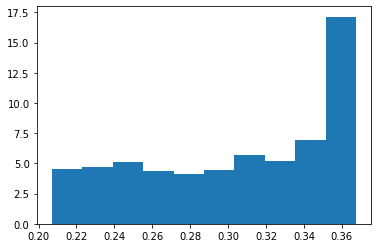

In [68]:
N = 1000
# arbitrary number
seed = 0.5
#generate N numbers
generator = SSSD(nu, mu,sigma)
numbers = generator.next(N)
plt.hist(numbers, density=True, bins=10)
plt.plot()

In [69]:
rand_nu = np.random.uniform(0.1, 10)
rand_mu = np.random.uniform(-5, 5)
rand_sigma = np.random.uniform(0.1, 10) 

mcmc = MCMC(rand_nu, rand_mu, rand_sigma, numbers) 

l = mcmc.likelihood()
print(l)

0.0
